In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [19]:
df = pd.read_csv(r'G:\Udemy Courses Files\Python Data Analysis Diploma\S23- Time series Analysis\timeseries-materials\datasets\multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


### Wrangle Dataset

In [21]:
df.columns = ['Month', 'diet', 'gym', 'finance']
df.head()

,Month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [22]:
df['Month'] = pd.to_datetime(df['Month'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


#### => Best-Practice: Make the date/time column the index

In [24]:
df.set_index('Month', inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


### Exploratory Data Analysis (EDA)
##### => Visualize the data

<Axes: xlabel='Month'>

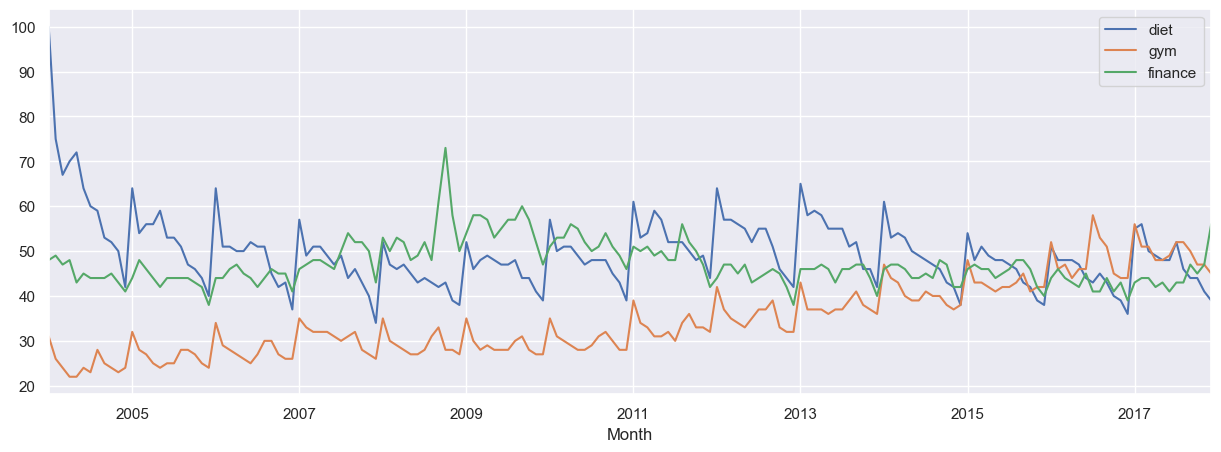

In [31]:
df.plot(figsize=(15,5))

<Axes: xlabel='Month'>

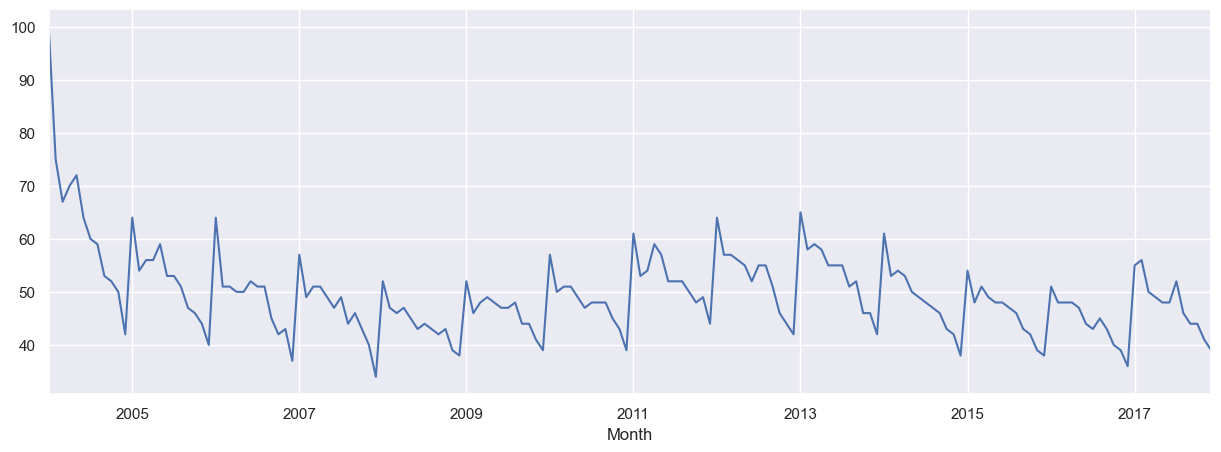

In [30]:
df['diet'].plot(figsize=(15, 5))

### Trends and Seasonality in Time Series Data

##### Identifying Trends in Time Series

There are several ways to think about identifying trends in time series. One popular way is by taking a *rolling average*, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a *window size*, which you need to choose.

*We need to remove the seasonality to identify the trends in the data...*
*i/e. converting from seasonality to trend*

<Axes: xlabel='Month'>

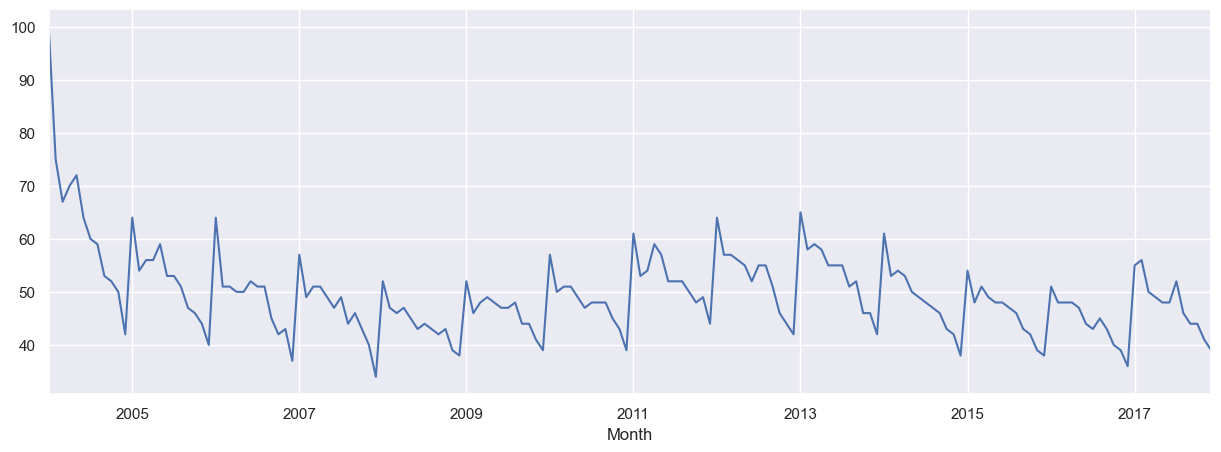

In [36]:
df['diet'].plot(figsize=(15, 5))

<Axes: xlabel='Month'>

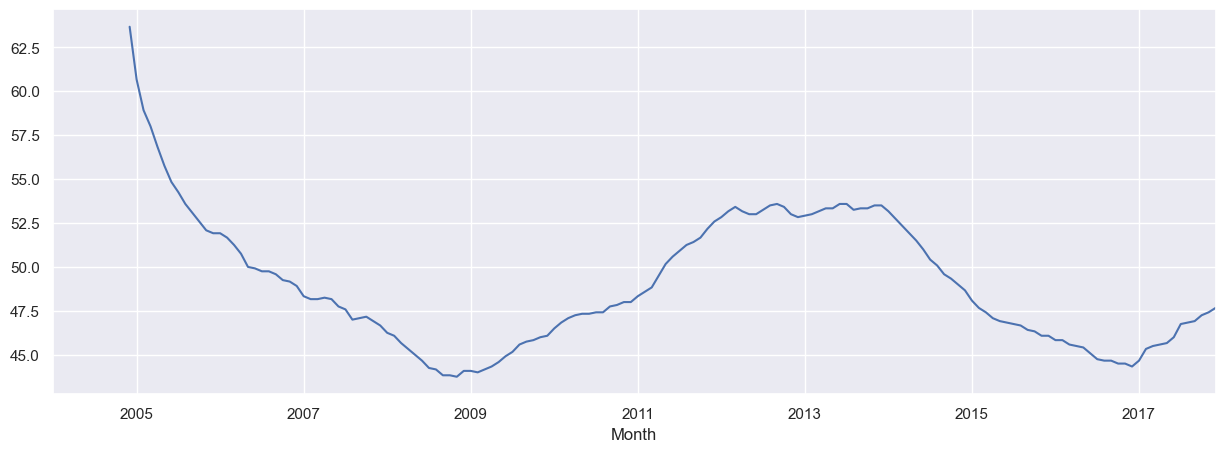

In [39]:
df['diet'].rolling(12).mean().plot(figsize=(15, 5))

<Axes: xlabel='Month'>

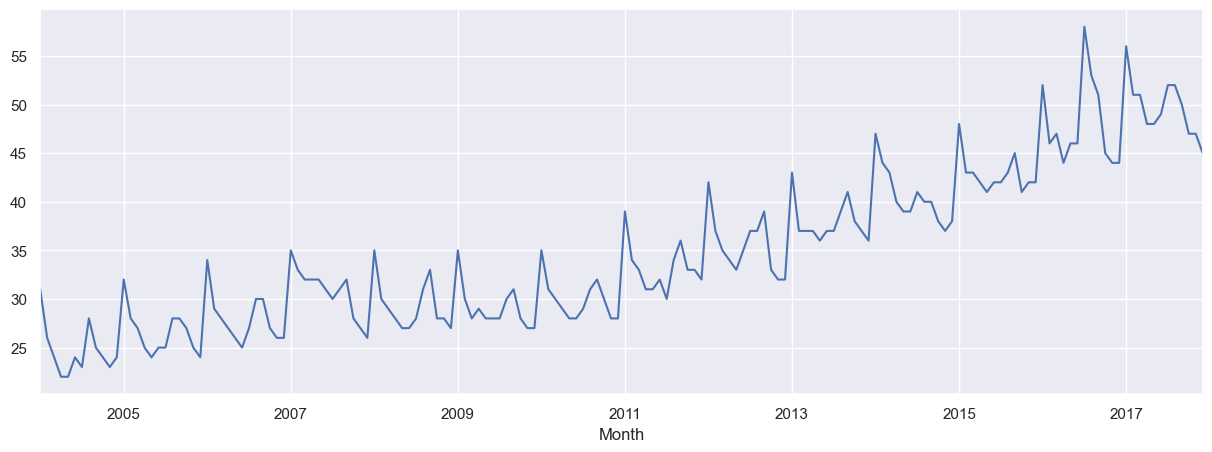

In [40]:
df['gym'].plot(figsize=(15, 5))

<Axes: xlabel='Month'>

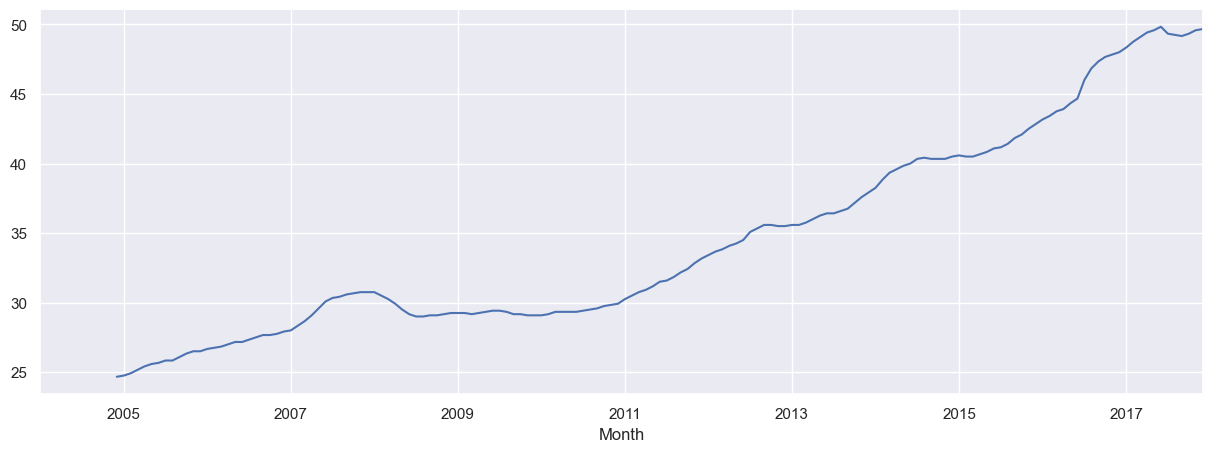

In [41]:
df['gym'].rolling(12).mean().plot(figsize=(15, 5))

<Axes: xlabel='Month'>

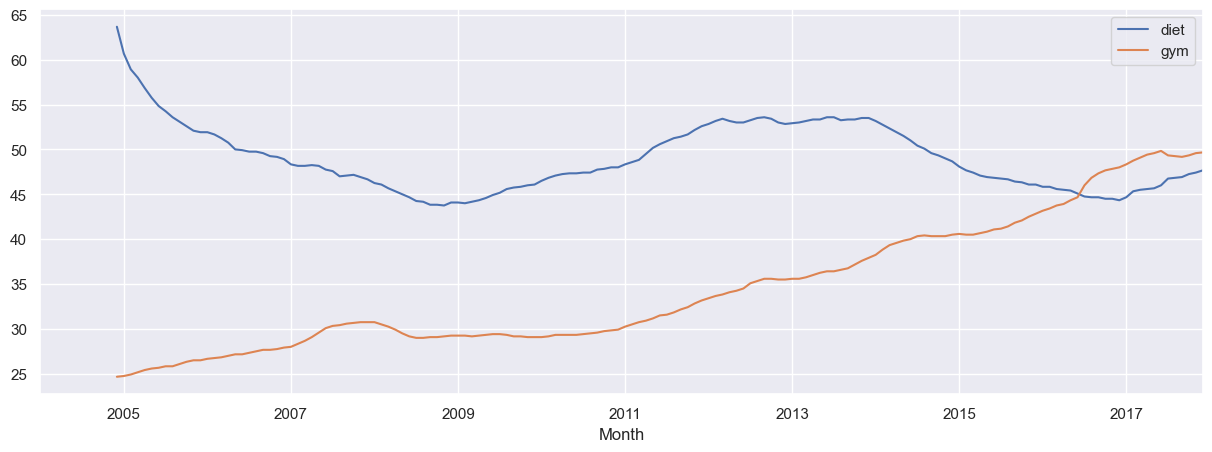

In [43]:
pd.concat([df['diet'].rolling(12).mean(), df['gym'].rolling(12).mean()], axis=1).plot(figsize=(15, 5))